In [215]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [216]:
# Read the data into a Pandas DataFrame
Hospital_infect_data = pd.read_csv('Resources/Healthcare_Associated_Infections_-_Hospital.csv')
Hospital_infect_data.head(10)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
5,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Central line-associated bloodstream infections...,HAI_1_SIR,No Different than National Benchmark,0.983,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
6,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Lower Confidence Limit,HAI_1a_CI_LOWER,Worse than the National Benchmark,1.168,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
7,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Upper Confidence Limit,HAI_1a_CI_UPPER,Worse than the National Benchmark,7.068,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
8,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Central Line Days,HAI_1a_DOPC_DAYS,Worse than the National Benchmark,1045,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
9,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Predicted Cases,HAI_1a_ELIGCASES,Worse than the National Benchmark,1.568,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"


In [217]:
# Get a brief summary of the dataframe.
Hospital_infect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222864 entries, 0 to 222863
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           222864 non-null  int64 
 1   Hospital Name         222864 non-null  object
 2   Address               222864 non-null  object
 3   City                  222864 non-null  object
 4   State                 222864 non-null  object
 5   ZIP Code              222864 non-null  int64 
 6   County Name           222240 non-null  object
 7   Phone Number          222864 non-null  int64 
 8   Measure Name          222864 non-null  object
 9   Measure ID            222864 non-null  object
 10  Compared to National  222864 non-null  object
 11  Score                 222864 non-null  object
 12  Footnote              141684 non-null  object
 13  Measure Start Date    222864 non-null  object
 14  Measure End Date      222864 non-null  object
 15  Location         

In [218]:
# Convert 'Score' column to numeric, coercing errors to NaN
Hospital_infect_data['Score'] = pd.to_numeric(Hospital_infect_data['Score'], errors='coerce')

# Check if 'Score' column conversion was successful
print(Hospital_infect_data['Score'].dtype)  # Should print 'float64' or 'int64'

float64


In [219]:
# Check for missing values
missing_values = Hospital_infect_data.isnull().sum()
missing_values

Provider ID                  0
Hospital Name                0
Address                      0
City                         0
State                        0
ZIP Code                     0
County Name                624
Phone Number                 0
Measure Name                 0
Measure ID                   0
Compared to National         0
Score                   124717
Footnote                 81180
Measure Start Date           0
Measure End Date             0
Location                     0
dtype: int64

In [220]:
# Check for duplicates in Uber data
duplicates = Hospital_infect_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print or use num_duplicates as needed
print("Number of duplicate rows in Hospital_infect_data:", num_duplicates)

Number of duplicate rows in Hospital_infect_data: 0


In [221]:
# Get unique categories in 'Compared to National'
unique_Compared_National = Hospital_infect_data['Compared to National'].unique()

# Display the unique Compared to National
print("Unique Compared to National:")
print(unique_Compared_National)

Unique Compared to National:
['No Different than National Benchmark'
 'Worse than the National Benchmark' 'Better than the National Benchmark'
 'Not Available']


In [222]:
# Count the number of 'Not Available' entries
not_available_count = Hospital_infect_data[Hospital_infect_data['Compared to National'] == 'Not Available'].shape[0]
print(f"\nNumber of 'Not Available' entries: {not_available_count}")


Number of 'Not Available' entries: 121398


In [223]:
print(Hospital_infect_data['Measure Name'].unique())

# Count the number of unique measure names
num_unique_measure_names = Hospital_infect_data['Measure Name'].nunique()

print(f"Number of unique measure names: {num_unique_measure_names}")

['CLABSI: Lower Confidence Limit' 'CLABSI: Upper Confidence Limit'
 'CLABSI: Number of Procedures' 'CLABSI: Predicted Cases'
 'CLABSI: Observed Cases'
 'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards'
 'CLABSI Lower Confidence Limit' 'CLABSI Upper Confidence Limit'
 'CLABSI Central Line Days' 'CLABSI Predicted Cases'
 'CLABSI Observed Cases'
 'Central line-associated blood stream infections (CLABSI) in ICUs only'
 'CAUTI: Lower Confidence Limit' 'CAUTI: Upper Confidence Limit'
 'CAUTI: Number of Procedures' 'CAUTI: Predicted Cases'
 'CAUTI: Observed Cases'
 'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards'
 'CAUTI Lower Confidence Limit' 'CAUTI Upper Confidence Limit'
 'CAUTI Urinary Catheter Days' 'CAUTI Predicted Cases'
 'CAUTI Observed Cases'
 'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only'
 'SSI: Colon Lower Confidence Limit' 'SSI: Colon Upper Confidence Limit'
 'C.diff Patient Days' 'SSI: Colon, Nu

In [224]:
# Convert 'Measure End Date' to datetime
Hospital_infect_data['Measure End Date'] = pd.to_datetime(Hospital_infect_data['Measure End Date'], errors='coerce')

# Extract year from 'Measure End Date'
Hospital_infect_data['Year'] = Hospital_infect_data['Measure End Date'].dt.year

# Count the number of records per year
records_per_year = Hospital_infect_data['Year'].value_counts().sort_index()

print("Number of records per year:")
print(records_per_year)

Number of records per year:
Year
2015    222864
Name: count, dtype: int64


# ETA 

# Hospital Performance Compared to National Benchmarks

In [225]:
#Performance Distribution (Count of Hospitals by Performance Category)
# Count of hospitals in each performance category
performance_counts = Hospital_infect_data['Compared to National'].value_counts()

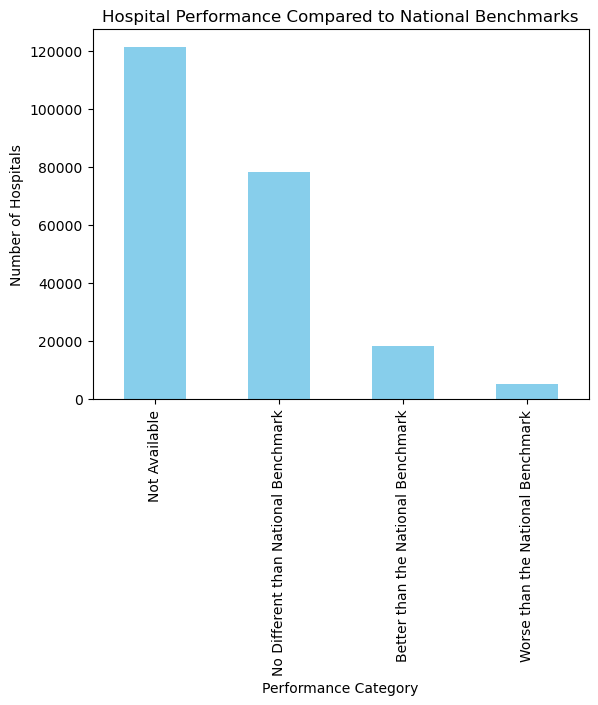

In [226]:
# Bar plot for performance distribution
performance_counts.plot(kind='bar', color='skyblue', title='Hospital Performance Compared to National Benchmarks')
plt.xlabel('Performance Category')
plt.ylabel('Number of Hospitals')
plt.show()

In [227]:
# define the score with better, worse and no differ hospital.  

# ETA-Measure-Specific Analysis

# Which infection scored high? 

In [228]:
# Distribution of Score 
Hospital_infect_data['Category'] = Hospital_infect_data['Measure Name'].apply(lambda x: 'CLABSI' if 'CLABSI' in x else
                                                 'CAUTI' if 'CAUTI' in x else
                                                 'SSI Colon' if 'Colon' in x else
                                                 'SSI Abdominal' if 'Abdominal' in x else
                                                 'MRSA' if 'MRSA' in x else
                                                 'C.diff')

# Group by the 'Category' column
grouped = Hospital_infect_data.groupby('Category')['Score'] 

# Print distribution stats
print(distribution_stats)


                 count          mean           std  min      25%     50%  \
Category                                                                   
C.diff         20043.0   7142.396405  26506.989493  0.0  0.79800  1.8440   
CAUTI          27590.0    768.304149   2531.502281  0.0  0.57700  1.8680   
CLABSI         23337.0    840.011999   3007.088322  0.0  0.44100  1.6600   
MRSA           11080.0  12872.829674  38040.809009  0.0  0.81975  2.0000   
SSI Abdominal   4155.0     57.622356    137.677245  0.0  1.00000  2.2760   
SSI Colon      11942.0     25.216753     69.644610  0.0  0.88025  2.0695   

                   75%       max  
Category                          
C.diff         38.0000  620882.0  
CAUTI           9.0000   50811.0  
CLABSI          8.6990   62637.0  
MRSA            6.0645  692659.0  
SSI Abdominal   6.0000    1766.0  
SSI Colon       6.0000    1481.0  


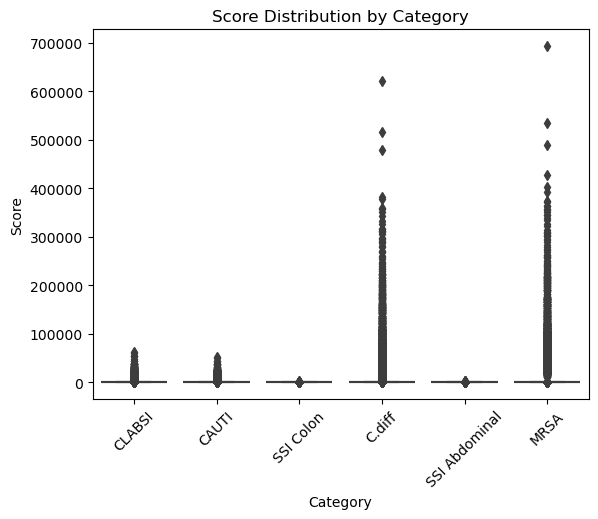

In [229]:
# Convert 'Score' column to numeric, coercing errors into NaN
Hospital_infect_data['Score'] = pd.to_numeric(Hospital_infect_data['Score'], errors='coerce')


# Grouping and plotting
sns.boxplot(x='Category', y='Score', data=Hospital_infect_data)
plt.xticks(rotation=45)
plt.title('Score Distribution by Category')
plt.show()

# ETA- Regional Trend

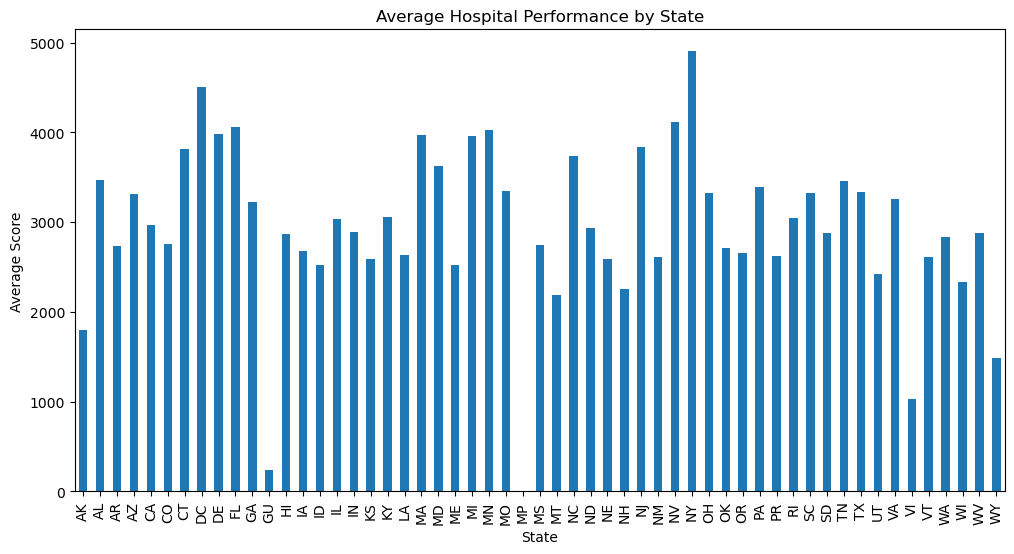

In [230]:
#Are hospitals in certain states performing better or worse than others? . High score poor management of infections.

state_performance = Hospital_infect_data.groupby('State')['Score'].mean()


plt.figure(figsize=(12, 6))
state_performance.plot(kind='bar')
plt.title('Average Hospital Performance by State')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

State
DC    10.571429
AL     7.058824
NV     6.588235
NY     6.147826
NC     6.057692
CT     5.950000
AR     5.714286
LA     5.595238
GA     5.540984
MI     5.415094
Name: CLABSI: Observed Cases, dtype: float64


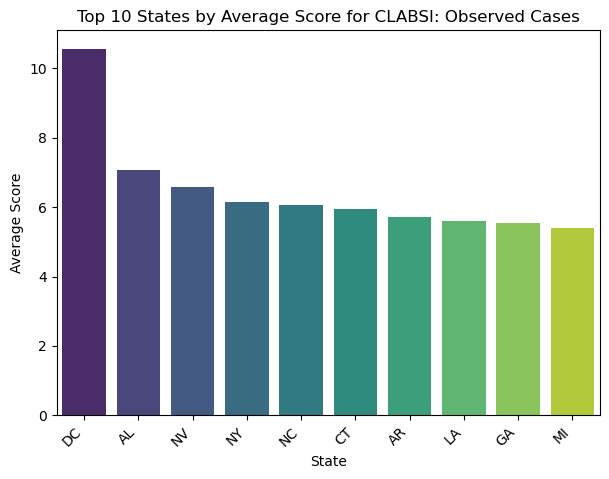

In [231]:
# Group by State and Measure Name to find the average score of measure. 
state_performance = Hospital_infect_data.groupby(['State', 'Measure Name'])['Score'].mean().unstack()

# Display the performance by state for a specific measure (e.g., CLABSI: Observed Cases)
print(state_performance['CLABSI: Observed Cases'].sort_values(ascending=False).head(10))

measure = 'CLABSI: Observed Cases'
top_states = state_performance[measure].sort_values(ascending=False).head(10)

plt.figure(figsize=(7, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top 10 States by Average Score for {measure}')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.show()

# Data cleaning & data wrangling 

# Remove missing values

In [232]:
# Remove rows where 'Score' is missing
hospital_data_cleaned = Hospital_infect_data.dropna(subset=['Score'])

# Check the shape of the cleaned data
print(f"Data shape after removing missing scores: {hospital_data_cleaned.shape}")

# Optional: Check if there are any remaining missing values in 'Score'
print(f"Remaining missing values in 'Score': {hospital_data_cleaned['Score'].isna().sum()}")


Data shape after removing missing scores: (98147, 18)
Remaining missing values in 'Score': 0


In [233]:
# Remove rows where 'Compared to National' is 'Not Available'
hospital_data_filtered = hospital_data_cleaned[hospital_data_cleaned['Compared to National'] != 'Not Available']

# Check the shape of the filtered data
print(f"Data shape after removing 'Not Available' entries: {hospital_data_filtered.shape}")

# Optional: Check if there are any remaining 'Not Available' values
print(f"Remaining 'Not Available' entries: {hospital_data_filtered[hospital_data_filtered['Compared to National'] == 'Not Available'].shape[0]}")

Data shape after removing 'Not Available' entries: (98147, 18)
Remaining 'Not Available' entries: 0


In [234]:
hospital_data_filtered.tail(10)



,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location,Year,Category
222837,490112,CJW MEDICAL CENTER,7101 JAHNKE ROAD,RICHMOND,VA,23235,CHESTERFIELD,8043302001,CAUTI: Predicted Cases,HAI_2_ELIGCASES,Better than the National Benchmark,23.535,NaN,01/01/2015,2015-06-30,"7101 JAHNKE ROAD\nRICHMOND, VA 23235\n(37.5158...",2015,CAUTI
222839,500079,MULTICARE GOOD SAMARITAN HOSPITAL,401 15TH AVENUE SE,PUYALLUP,WA,98372,PIERCE,2536972102,MRSA Upper Confidence Limit,HAI_5_CI_UPPER,No Different than National Benchmark,1.644,NaN,07/01/2014,2015-06-30,"401 15TH AVENUE SE\nPUYALLUP, WA 98372\n(47.17...",2015,MRSA
222842,210004,HOLY CROSS HOSPITAL,1500 FOREST GLEN ROAD,SILVER SPRING,MD,20910,MONTGOMERY,3017547000,Central line-associated bloodstream infections...,HAI_1_SIR,No Different than National Benchmark,0.702,NaN,01/01/2015,2015-06-30,"1500 FOREST GLEN ROAD\nSILVER SPRING, MD 20910...",2015,CLABSI
222843,500119,VALLEY HOSPITAL,12606 EAST MISSION AVENUE,SPOKANE,WA,99216,SPOKANE,5099246650,C.diff Patient Days,HAI_6_DOPC_DAYS,No Different than National Benchmark,20746.000,NaN,07/01/2014,2015-06-30,"12606 EAST MISSION AVENUE\nSPOKANE, WA 99216\n...",2015,C.diff
222847,110031,SPALDING REGIONAL HOSPITAL,601 SOUTH 8TH STREET,GRIFFIN,GA,30223,SPALDING,7702282721,SSI: Colon Upper Confidence Limit,HAI_3_CI_UPPER,No Different than National Benchmark,6.344,NaN,07/01/2014,2015-06-30,"601 SOUTH 8TH STREET\nGRIFFIN, GA 30223\n(33.2...",2015,SSI Colon
222850,260068,BOONE HOSPITAL CENTER,1600 E BROADWAY,COLUMBIA,MO,65201,BOONE,5738158000,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,1.720,NaN,01/01/2015,2015-06-30,"1600 E BROADWAY\nCOLUMBIA, MO 65201\n(38.95066...",2015,CLABSI
222858,80007,BEEBE MEDICAL CENTER,424 SAVANNAH RD,LEWES,DE,19958,SUSSEX,3026453300,SSI: Colon Predicted Cases,HAI_3_ELIGCASES,Better than the National Benchmark,4.172,8 - The lower limit of the confidence interval...,07/01/2014,2015-06-30,"424 SAVANNAH RD\nLEWES, DE 19958\n(38.776557, ...",2015,SSI Colon
222861,150026,IU HEALTH GOSHEN HOSPITAL,200 HIGH PARK AVE,GOSHEN,IN,46526,ELKHART,5743641000,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1416.000,NaN,01/01/2015,2015-06-30,"200 HIGH PARK AVE\nGOSHEN, IN 46526\n(41.56432...",2015,CLABSI
222862,50038,SANTA CLARA VALLEY MEDICAL CENTER,751 SOUTH BASCOM AVENUE,SAN JOSE,CA,95128,SANTA CLARA,4088855000,SSI: Colon Predicted Cases,HAI_3_ELIGCASES,Worse than the National Benchmark,3.246,NaN,07/01/2014,2015-06-30,"751 SOUTH BASCOM AVENUE\nSAN JOSE, CA 95128\n(...",2015,SSI Colon
222863,140217,PRESENCE SAINT JOSEPH HOSPITAL - ELGIN,77 N AIRLITE STREET,ELGIN,IL,60123,KANE,8476953200,MRSA Lower Confidence Limit,HAI_5_CI_LOWER,No Different than National Benchmark,0.219,NaN,07/01/2014,2015-06-30,"77 N AIRLITE STREET\nELGIN, IL 60123\n(42.0362...",2015,MRSA


In [235]:
hospital_data_filtered['Measure Name'] = hospital_data_filtered['Measure Name'].replace({
    'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards': 
    'CLABSI: Central line-associated bloodstream infections (CLABSI) in ICUs and select wards',
    
    'CLABSI Lower Confidence Limit': 
    'CLABSI: Lower Confidence Limit',
    
    'CLABSI Upper Confidence Limit': 
    'CLABSI: Upper Confidence Limit',
    
    'CLABSI Central Line Days': 
    'CLABSI: Central Line Days',
    
    'CLABSI Predicted Cases': 
    'CLABSI: Predicted Cases',
    
    'CLABSI Observed Cases': 
    'CLABSI: Observed Cases',
    
    'Central line-associated blood stream infections (CLABSI) in ICUs only': 
    'CLABSI: Central line-associated blood stream infections (CLABSI) in ICUs only',
    
    'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards': 
    'CAUTI: Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards',
    
    'CAUTI Lower Confidence Limit': 
    'CAUTI: CAUTI Lower Confidence Limit',
    
    'CAUTI Upper Confidence Limit': 
    'CAUTI: Upper Confidence Limit',
    
    'CAUTI Urinary Catheter Days': 
    'CAUTI: Urinary Catheter Days',
    
    'CAUTI Predicted Cases': 
    'CAUTI: Predicted Cases',
    
    'CAUTI Observed Cases': 
    'CAUTI: Observed Cases',
    
    'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only': 
    'CAUTI: Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only',
    
    'C.diff Patient Days': 
    'C.diff: C.diff Patient Days',
    
    'Surgical Site Infection from colon surgery (SSI: Colon)': 
    'SSI: Surgical Site Infection from colon surgery (SSI: Colon)',
    
    'Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy)': 
    'SSI: Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy)',
    
    'MRSA Lower Confidence Limit': 
    'MRSA: MRSA Lower Confidence Limit',
    
    'MRSA Upper Confidence Limit': 
    'MRSA: MRSA Upper Confidence Limit',
    
    'MRSA Patient Days': 
    'MRSA: Patient Days',
    
    'MRSA Predicted Cases': 
    'MRSA: Predicted Cases',
    
    'MRSA Observed Cases': 
    'MRSA: Observed Cases',
    
    'Methicillin-resistant Staphylococcus Aureus (MRSA) Blood Laboratory-identified Events (Bloodstream infections)': 
    'MRSA: Methicillin-resistant Staphylococcus Aureus (MRSA) Blood Laboratory-identified Events (Bloodstream infections)',
    
    'C.diff Lower Confidence Limit': 
    'C.diff: C.diff Lower Confidence Limit',
    
    'C.diff Upper Confidence Limit': 
    'C.diff: C.diff Upper Confidence Limit',
    
    'C.diff Predicted Cases': 
    'C.diff: C.diff Predicted Cases', 
    
    'C.diff Observed Cases': 
    'C.diff: C.diff Observed Cases',
    
    'Clostridium difficile (C.diff.) Laboratory-identified Events (Intestinal infections)': 
    'C.diff: Clostridium difficile (C.diff.) Laboratory-identified Events (Intestinal infections)'
})



In [236]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location,Year,Category
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
5,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Central line-associated bloodstream in...,HAI_1_SIR,No Different than National Benchmark,0.983,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
6,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1a_CI_LOWER,Worse than the National Benchmark,1.168,NaN,07/01/2014,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
7,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1a_CI_UPPER,Worse than the National Benchmark,7.068,NaN,07/01/2014,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
8,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Central Line Days,HAI_1a_DOPC_DAYS,Worse than the National Benchmark,1045.000,NaN,07/01/2014,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI
9,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1a_ELIGCASES,Worse than the National Benchmark,1.568,NaN,07/01/2014,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI


In [237]:
# split the Measure name col. 

# Split the 'Measure Name' column into 'Abbreviation' and 'Description'
hospital_data_filtered[['Infection', 'Measure']] = hospital_data_filtered['Measure Name'].str.split(': ', n=1, expand=True)

# Display the resulting DataFrame
hospital_data_filtered.head(10)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location,Year,Category,Infection,Measure
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Lower Confidence Limit
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Upper Confidence Limit
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Number of Procedures
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Predicted Cases
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Observed Cases
5,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Central line-associated bloodstream in...,HAI_1_SIR,No Different than National Benchmark,0.983,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Central line-associated bloodstream infections...
6,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1a_CI_LOWER,Worse than the National Benchmark,1.168,NaN,07/01/2014,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Lower Confidence Limit
7,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1a_CI_UPPER,Worse than the National Benchmark,7.068,NaN,07/01/2014,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Upper Confidence Limit
8,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Central Line Days,HAI_1a_DOPC_DAYS,Worse than the National Benchmark,1045.000,NaN,07/01/2014,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Central Line Days
9,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1a_ELIGCASES,Worse than the National Benchmark,1.568,NaN,07/01/2014,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015,CLABSI,CLABSI,Predicted Cases


In [241]:
# List of columns to drop
columns_to_drop = ['Footnote', 'Location', 'Category']

# Drop the columns if they exist in the DataFrame
hospital_data_filtered = hospital_data_filtered.drop(columns=[col for col in columns_to_drop if col in hospital_data_filtered.columns])


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Measure Start Date,Measure End Date,Year,Infection,Measure
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,01/01/2015,2015-06-30,2015,CLABSI,Lower Confidence Limit
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,01/01/2015,2015-06-30,2015,CLABSI,Upper Confidence Limit
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485.000,01/01/2015,2015-06-30,2015,CLABSI,Number of Procedures
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,01/01/2015,2015-06-30,2015,CLABSI,Predicted Cases
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2.000,01/01/2015,2015-06-30,2015,CLABSI,Observed Cases


In [242]:
# Ensure the 'Measure Start Date' and 'Measure End Date' columns are in datetime format
hospital_data_filtered['Measure Start Date'] = pd.to_datetime(hospital_data_filtered['Measure Start Date'])
hospital_data_filtered['Measure End Date'] = pd.to_datetime(hospital_data_filtered['Measure End Date'])

# Calculate the number of days between 'Measure Start Date' and 'Measure End Date'
hospital_data_filtered['Number of Measure Days'] = (hospital_data_filtered['Measure End Date'] - hospital_data_filtered['Measure Start Date']).dt.days

In [243]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Measure Start Date,Measure End Date,Year,Infection,Measure,Number of Measure Days
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,2015-01-01,2015-06-30,2015,CLABSI,Lower Confidence Limit,180
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,2015-01-01,2015-06-30,2015,CLABSI,Upper Confidence Limit,180
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485.000,2015-01-01,2015-06-30,2015,CLABSI,Number of Procedures,180
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,2015-01-01,2015-06-30,2015,CLABSI,Predicted Cases,180
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2.000,2015-01-01,2015-06-30,2015,CLABSI,Observed Cases,180


In [245]:
# Save the DataFrame to a CSV file
filename = 'hospital_data_filtered.csv'
hospital_data_filtered.to_csv(filename, index=False)

# Data Analysis

# Hospital performance Compared to National Benchmarks:

In [263]:
# Categorize hospitals into 'Better', 'Worse', or 'Same' based on performance compared to national benchmarks
performance_categories = hospital_data_filtered['Compared to National'].value_counts()
print(performance_categories)

# Group by performance category and count the number of hospitals in each category
performance_group = hospital_data_filtered.groupby('Compared to National')['Measure ID'].count()
print(performance_group)

Compared to National
No Different than National Benchmark    75777
Better than the National Benchmark      17336
Worse than the National Benchmark        5034
Name: count, dtype: int64
Compared to National
Better than the National Benchmark      17336
No Different than National Benchmark    75777
Worse than the National Benchmark        5034
Name: Measure ID, dtype: int64


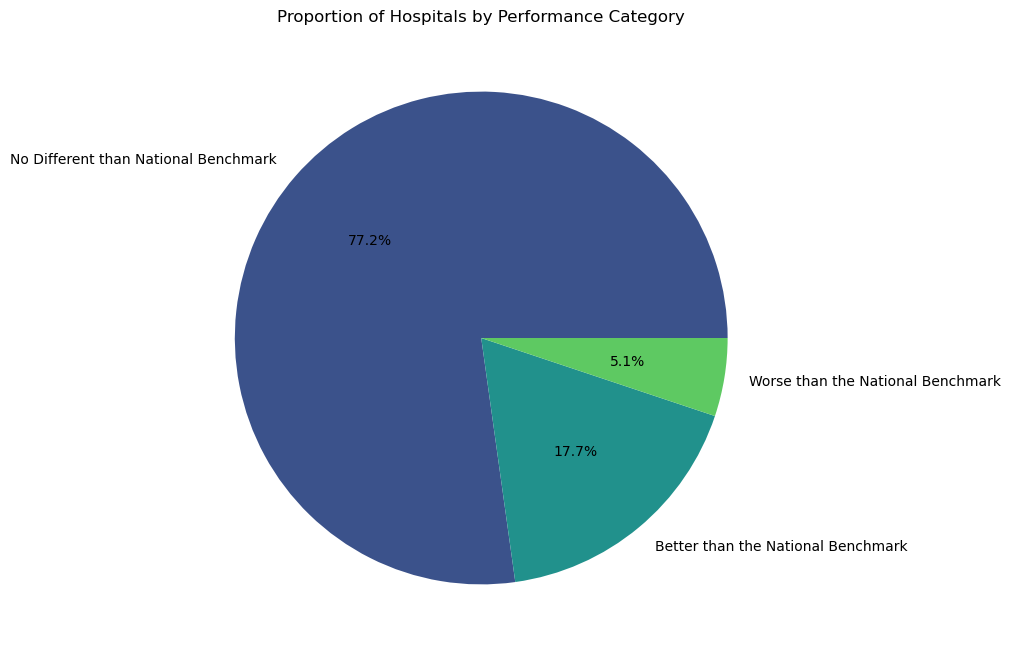

In [290]:
# Count the number of hospitals in each performance category
performance_counts = hospital_data_filtered['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category')
plt.show()

# Performance by State:
This visual compares the number of hospitals performing better or worse than national benchmarks across different states.

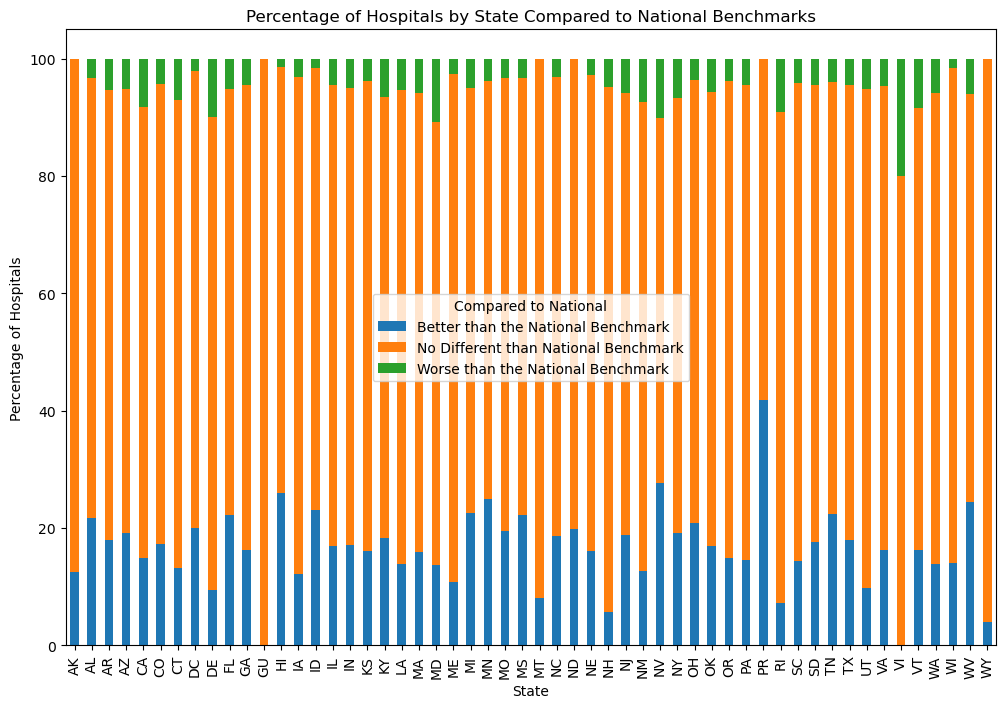

In [280]:
# Group by state and performance compared to national benchmarks
state_performance = hospital_data_filtered.groupby(['State', 'Compared to National'])['Measure ID'].count().unstack().fillna(0)

# Calculate percentage distribution
state_performance_percentage = state_performance.div(state_performance.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
ax = state_performance_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Percentage of Hospitals by State Compared to National Benchmarks')
plt.xlabel('State')
plt.ylabel('Percentage of Hospitals')
plt.legend(title='Compared to National')
plt.xticks(rotation=90)
plt.show()

State
DC    10.142857
AL     7.426471
NV     7.235294
NM     6.315789
SC     6.016949
LA     5.902439
GA     5.901639
NC     5.757282
AR     5.744186
KY     5.656250
Name: CLABSI: Observed Cases, dtype: float64


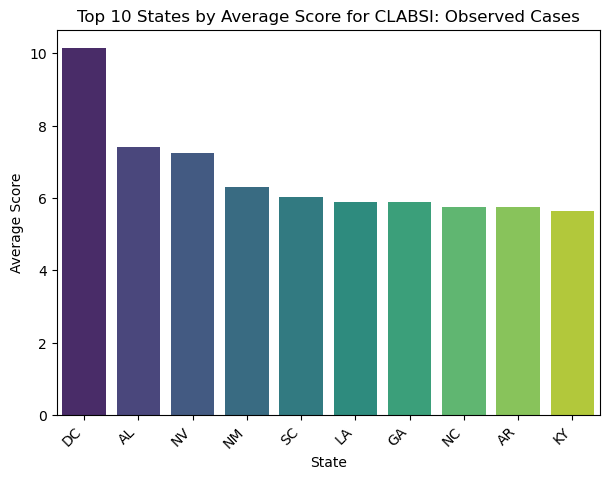

In [296]:
# Group by State and Measure Name to find the average score of measure. 
state_performance = hospital_data_filtered.groupby(['State', 'Measure Name'])['Score'].mean().unstack()

# Display the performance by state for a specific measure (e.g., CLABSI: Observed Cases)
print(state_performance['CLABSI: Observed Cases'].sort_values(ascending=False).head(10))

measure = 'CLABSI: Observed Cases'
top_states = state_performance[measure].sort_values(ascending=False).head(10)

plt.figure(figsize=(7, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top 10 States by Average Score for {measure}')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.show()

# Measure-Specific Performance:
A heatmap to show performance on specific infection control measures across hospitals.

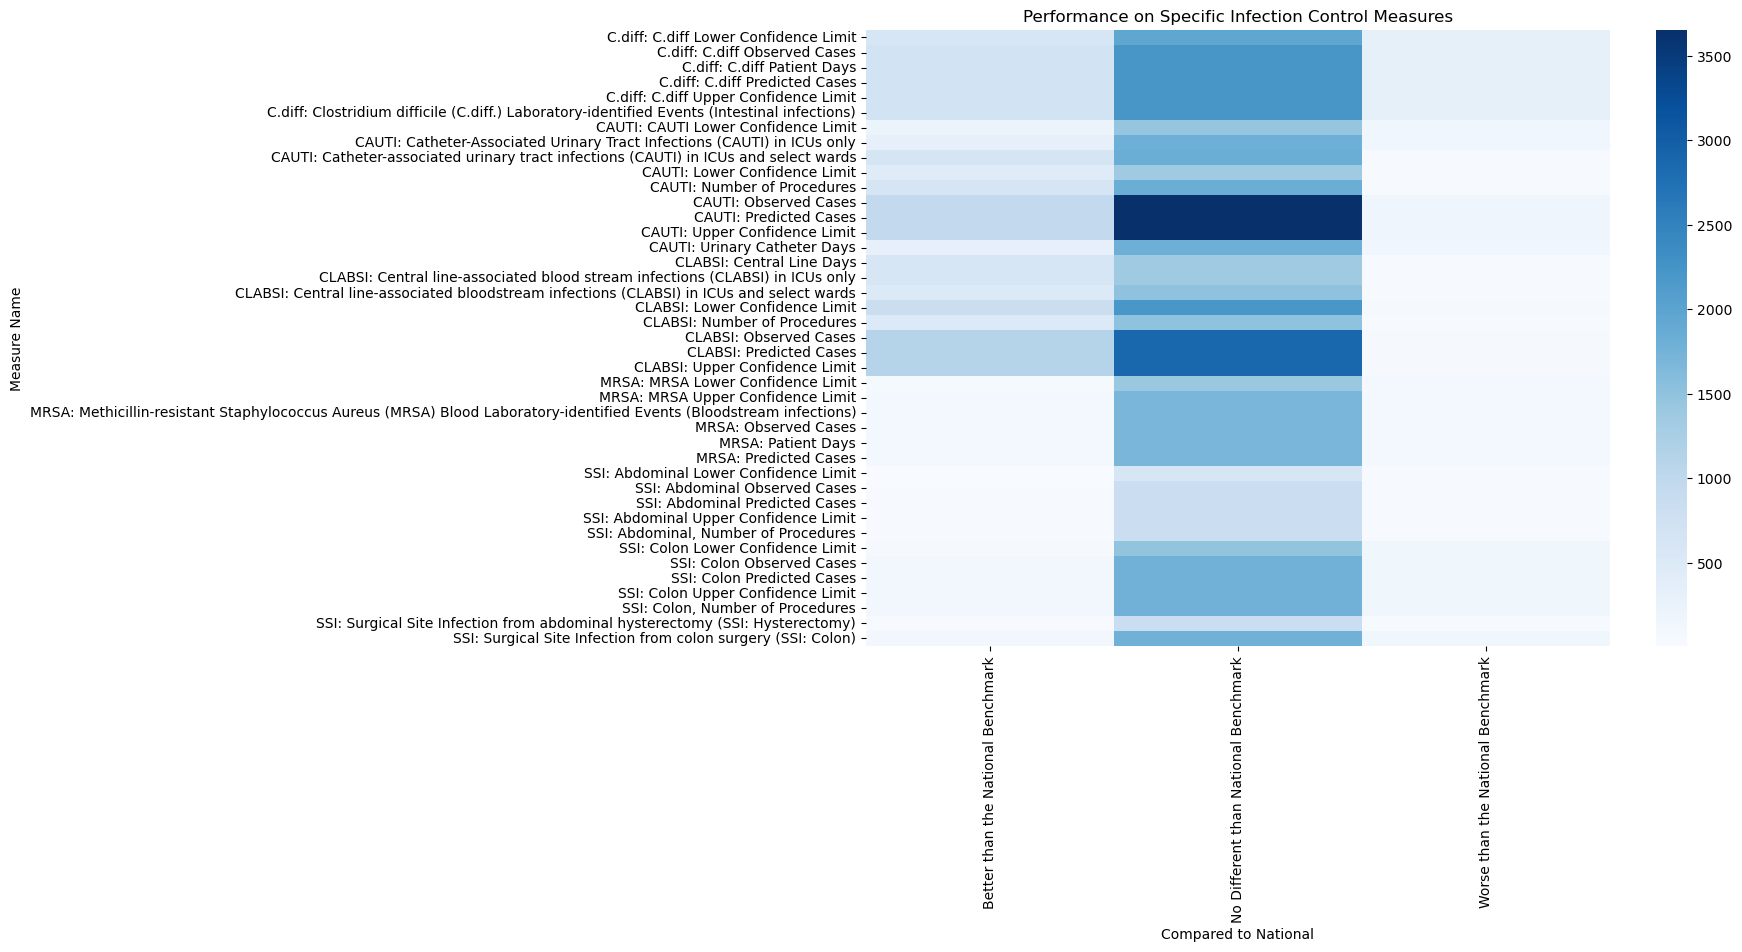

In [274]:
# Group by measure name and performance
measure_performance = hospital_data_filtered.groupby(['Measure Name', 'Compared to National'])['Measure ID'].count().unstack()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(measure_performance, cmap='Blues')
plt.title('Performance on Specific Infection Control Measures')
plt.xlabel('Compared to National')
plt.ylabel('Measure Name')
plt.show()


# Performance by Infection Type
A box plot to visualize the distribution of scores for different infection types.

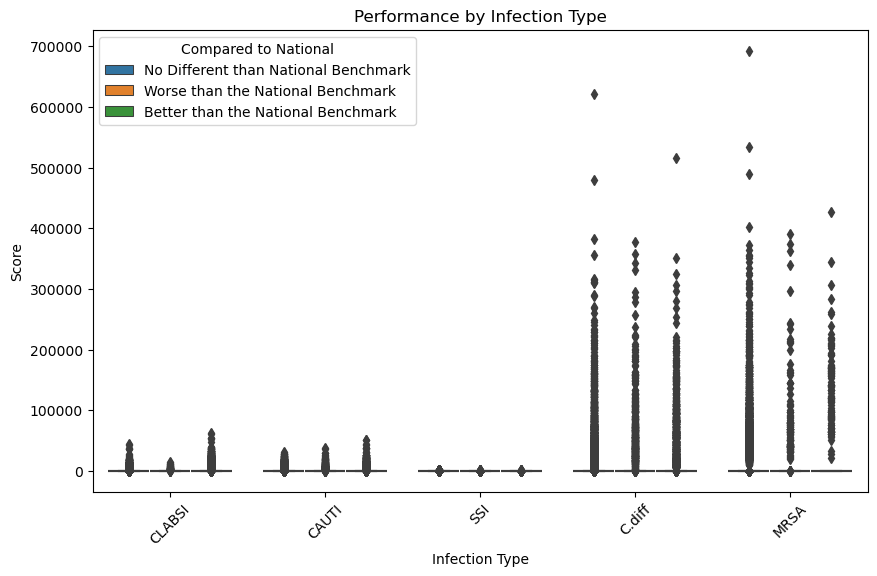

In [282]:
# Create a box plot for performance by infection type. Do stat. 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Infection', y='Score', hue='Compared to National', data=hospital_data_filtered)
plt.title('Performance by Infection Type')
plt.xlabel('Infection Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Performance vs. Number of Measure Days
A scatter plot to analyze the relationship between the number of measure days and hospital performance.

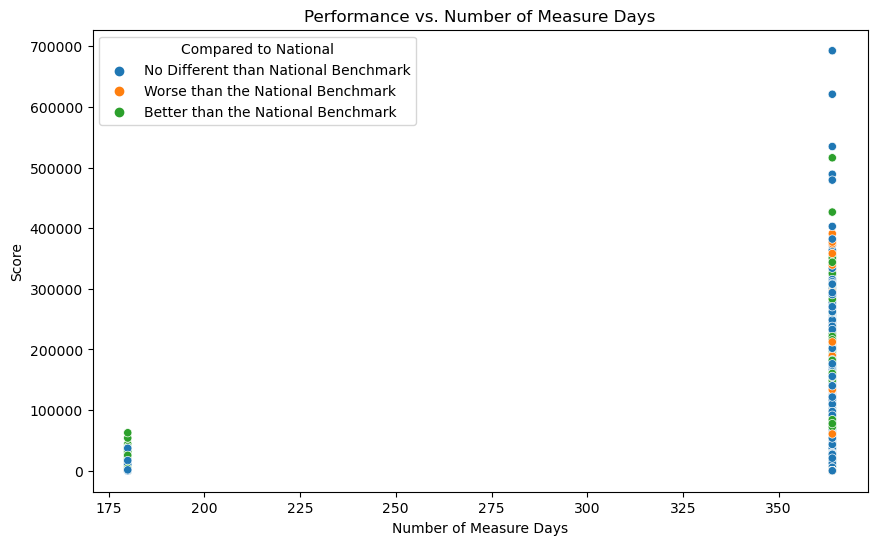

In [295]:
# Create a scatter plot for performance vs. number of measure days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Measure Days', y='Score', hue='Compared to National', data=hospital_data_filtered)
plt.title('Performance vs. Number of Measure Days')
plt.xlabel('Number of Measure Days')
plt.ylabel('Score')
plt.show()